In [1]:
#Required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in and get an overview of the data

In [2]:
df = pd.read_csv('miles-driven.csv',sep='|')

In [3]:
df1 = pd.read_csv('road-accidents.csv',comment='#',sep='|')

In [4]:
df.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
df1.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [6]:
df.shape,df1.shape

((51, 2), (51, 5))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [9]:
car_acc = df1.merge(df[['state','million_miles_annually']])

In [10]:
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [11]:
car_acc.shape

(51, 6)

In [12]:
car_acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
count,51.000000,51.000000,51.000000,51.00000,51.000000
mean,15.790196,31.725490,30.686275,88.72549,57851.019608
std,4.122002,9.633438,5.132213,6.96011,59898.414088
min,5.900000,13.000000,16.000000,76.00000,3568.000000
25%,12.750000,23.000000,28.000000,83.50000,17450.000000
50%,15.600000,34.000000,30.000000,88.00000,46606.000000
75%,18.500000,38.000000,33.000000,95.00000,71922.500000
max,23.900000,54.000000,44.000000,100.00000,320784.000000


Create a textual and a graphical summary of the data

In [13]:
import ydata_profiling as pp
profile = pp.ProfileReport(car_acc)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
corr = car_acc.corr()

<AxesSubplot:>

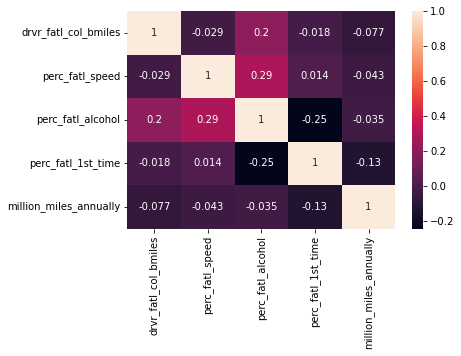

In [15]:
sns.heatmap(corr,annot=True)

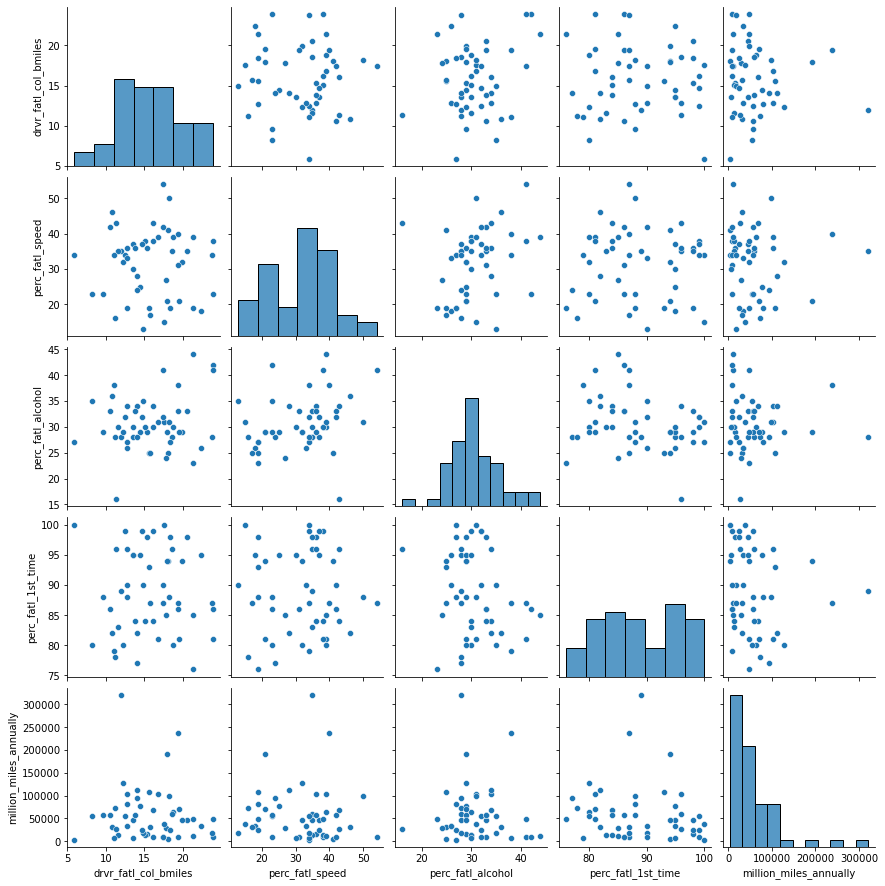

In [16]:
sns.pairplot(car_acc)

Quantify the association of features and accidents

In [17]:
corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


Hear we can draw the insight that we don't have a great correlation between the features with each other
1.perc_fatl_speed is 0.286244 correlated with perc_fatl_alcohol
2.perc_fatl_1st_time is -0.245455 correlated with perc_fatl_alcohol
3.perc_fatl_alcohol is 0.199426 correlated with drvr_fatl_col_bmiles

Fit a multivariate linear regression

In [18]:
from sklearn import linear_model

In [19]:
features = car_acc[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]
target = car_acc['drvr_fatl_col_bmiles']

In [20]:
reg = linear_model.LinearRegression()

In [21]:
reg.fit(features,target)

LinearRegression()

In [22]:
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

Perform PCA on standardized data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(feature_scaled)

PCA()

([<matplotlib.axis.XTick at 0x22e6211d460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

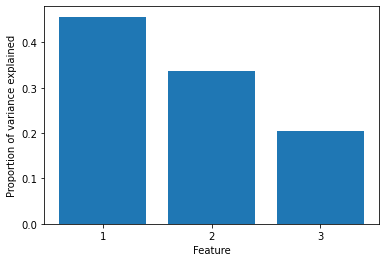

In [25]:
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Feature')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

In [26]:
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(two_first_comp_var_exp))

The cumulative variance of the first two principal components is 0.7946978608104825


7. Visualize the first two principal components

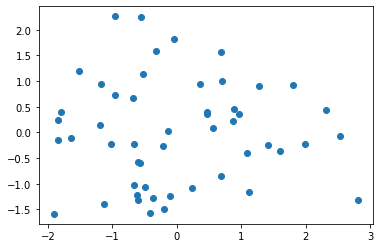

In [27]:
pca = PCA(n_components=2)
p_scaled = pca.fit_transform(feature_scaled)
p1 = p_scaled[:,0]
p2 = p_scaled[:,1]
plt.scatter(p1,p2)

8. Find clusters of similar states in the data

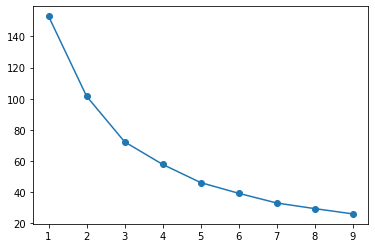

In [28]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(feature_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

9. KMeans to visualize clusters in the PCA scatter plot

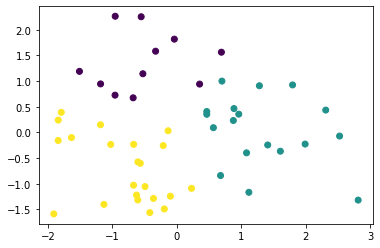

In [29]:
k = KMeans(n_clusters=3)
k.fit(feature_scaled)
plt.scatter(p1,p2,c = k.labels_)

10. Visualize the feature differences between the clusters

In [30]:
car_acc['cluster'] = k.labels_
car_acc2 = pd.melt(car_acc,id_vars = ['cluster'],var_name=['measurement'],value_name='percent',value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])


<AxesSubplot:xlabel='percent', ylabel='measurement'>

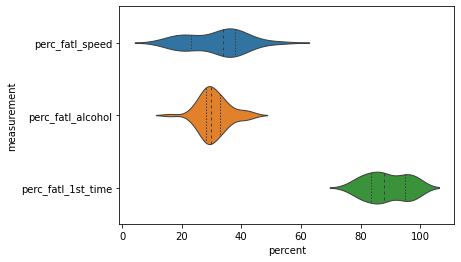

In [31]:
sns.violinplot(car_acc2['percent'], car_acc2['measurement'],split=True, inner="quart", linewidth=1,)

<AxesSubplot:xlabel='percent', ylabel='measurement'>

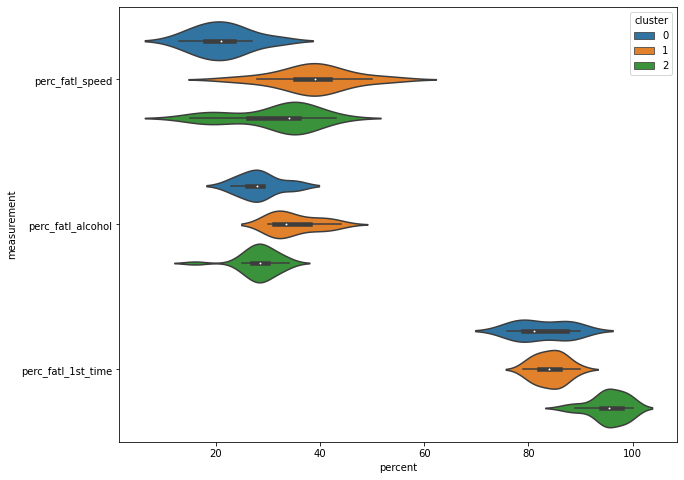

In [32]:
plt.figure(figsize=(10,8))
sns.violinplot(car_acc2['percent'], car_acc2['measurement'], hue = car_acc2['cluster'])

11.Compute the number of accidents within each cluster

In [33]:
car_acc['total_car_accident'] = (car_acc['drvr_fatl_col_bmiles'] * car_acc['million_miles_annually']) / 1000

<AxesSubplot:xlabel='cluster', ylabel='total_car_accident'>

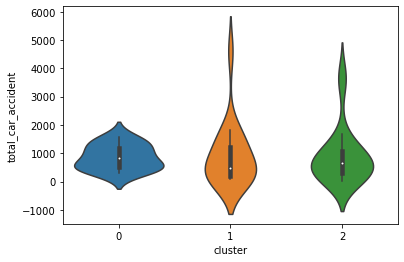

In [34]:
sns.violinplot(x=car_acc['cluster'],y=car_acc['total_car_accident'],inner='box')

In [35]:
car_acc.sample(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster,total_car_accident
41,South Dakota,19.4,31,33,86,9002,1,174.6388
26,Montana,21.4,39,44,85,11660,1,249.5240
30,New Jersey,11.2,16,28,78,73094,0,818.6528
40,South Carolina,23.9,38,41,81,48730,1,1164.6470
48,West Virginia,23.8,34,28,87,18963,2,451.3194


In [36]:
car_acc2.sample(5)

,cluster,measurement,percent
126,2,perc_fatl_1st_time,100
20,2,perc_fatl_speed,34
73,0,perc_fatl_alcohol,28
50,1,perc_fatl_speed,42
4,2,perc_fatl_speed,35


In [37]:
mean_car_acc = car_acc.groupby('cluster')['total_car_accident'].agg(['count','mean','sum'])

In [38]:
mean_car_acc

,count,mean,sum
cluster,,,
0,11,860.505945,9465.5654
1,18,911.406439,16405.3159
2,22,898.378595,19764.3291


<AxesSubplot:xlabel='cluster', ylabel='total_car_accident'>

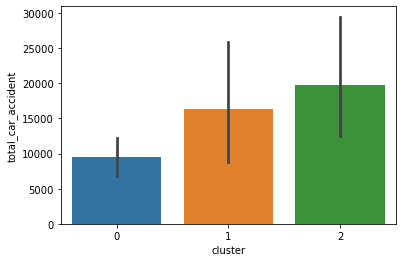

In [39]:
sns.barplot(x=car_acc['cluster'],y=car_acc['total_car_accident'],estimator=sum)

HERE WE CAN SAY THAT CLUSTER-3 HAVING TOO MAY ACCIDENT AS COMPARED TO THE OTHER TWO CLUSTER BUT WE CAN NOT CERTAINLY TELL THAT THIS IS THE SOLUTION YET.CLUSTER-3 REPRESENT THE FIRST TIME CAR ACCIDENT IN THE RESPECTIVE STATE .